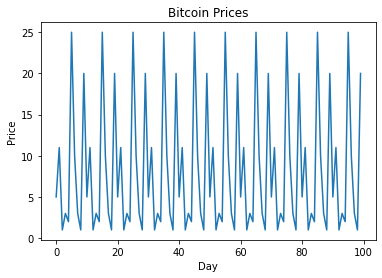

In [52]:
import pyibl
import random
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm

PARTICIPANTS = 10
ROUNDS = 100
NOISE = 0.25
DECAY = 0.5
DEFAULT_UTILITY = 30

BITCOIN_PRICES = [5, 11, 1, 3, 2, 25, 10, 3, 1, 20] * 10

plt.plot([day for day, _ in enumerate(BITCOIN_PRICES)], BITCOIN_PRICES)
plt.title('Bitcoin Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


100%|██████████| 10/10 [00:00<00:00, 17.82it/s]


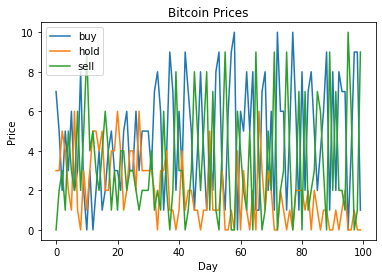

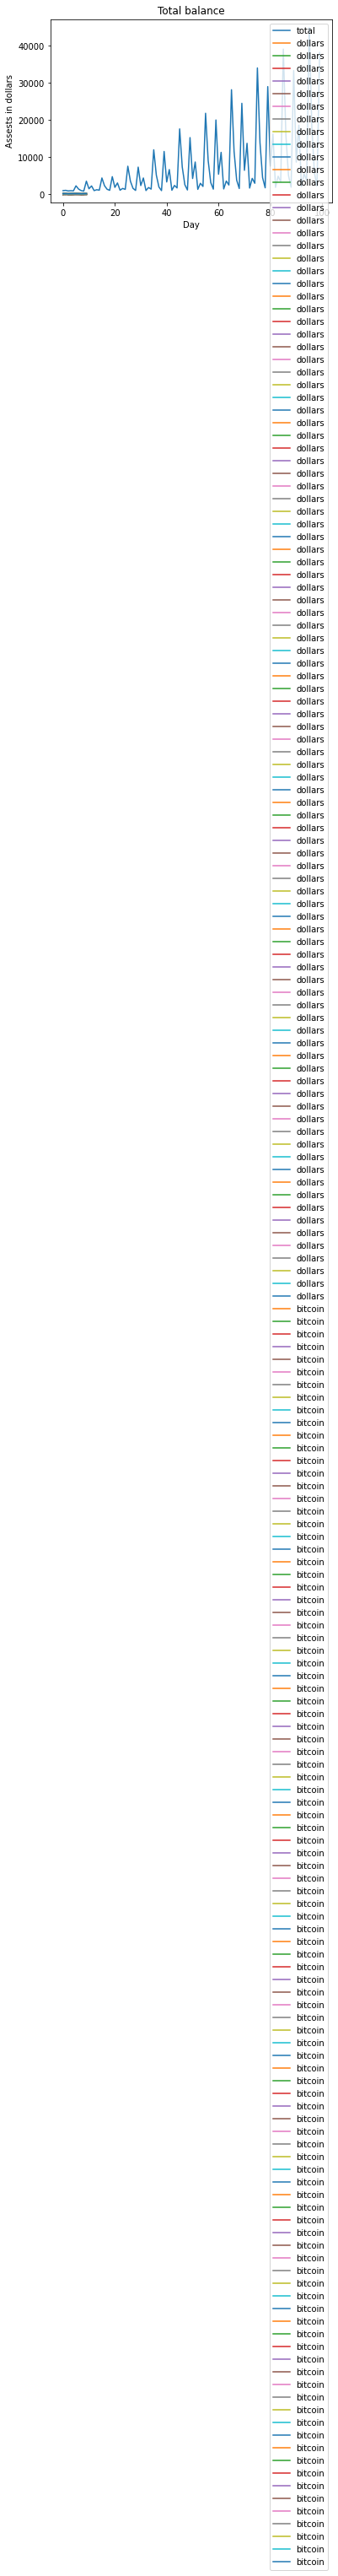

In [58]:
def run(bitcoin_prices, participants):
    agent = pyibl.Agent("Agent", ['action', 'price'], optimized_learning=False, default_utility=DEFAULT_UTILITY, noise=NOISE, decay=DECAY)

    selects_buy  = np.zeros((participants, len(bitcoin_prices)))
    selects_sell = np.zeros((participants, len(bitcoin_prices)))
    selects_hold = np.zeros((participants, len(bitcoin_prices)))

    total_balance = np.zeros((participants, len(bitcoin_prices)))
    total_dollars = np.zeros((participants, len(bitcoin_prices)))
    total_bitcoin = np.zeros((participants, len(bitcoin_prices)))


    for participant in tqdm(range(participants)):
        agent.reset()
        dollar_balance = 100
        bitcoin_balance = 0
        
        for day, price in enumerate(bitcoin_prices):
            choices = [
                {'action': 'hold', 'price': price},
            ]

            if dollar_balance >= 10:
                choices.append({'action': 'buy', 'price': price})

            if bitcoin_balance >= 1:
                choices.append({'action': 'sell', 'price': price})

            choice = agent.choose(*choices)

            if choice['action'] == 'buy':
                selects_buy[participant][day] += 1
                agent.respond(10)
                dollar_balance -= 10
                bitcoin_balance += 10 / price
            if choice['action'] == 'sell':
                selects_sell[participant][day] += 1
                agent.respond(price)
                dollar_balance += price
                bitcoin_balance -= 1

            if choice['action'] == 'hold':
                selects_hold[participant][day] += 1
                agent.respond(0)

            total_balance[participant][day] = dollar_balance + bitcoin_balance * price
            total_dollars[participant][day] = dollar_balance
            total_bitcoin[participant][day] = bitcoin_balance


    selects_buy = selects_buy.sum(axis=0)
    selects_sell = selects_sell.sum(axis=0)
    selects_hold = selects_hold.sum(axis=0)
    total_balance = total_balance.sum(axis=0)
    total_dollars = total_dollars.sum(axis=0)
    total_bitcoin = total_bitcoin.sum(axis=0)
    

    plt.plot([day for day, _ in enumerate(selects_buy)], selects_buy, label = "buy")
    plt.plot([day for day, _ in enumerate(selects_hold)], selects_hold, label = "hold")
    plt.plot([day for day, _ in enumerate(selects_sell)], selects_sell, label = "sell")
    plt.title('Bitcoin Prices')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    plt.plot([day for day, _ in enumerate(total_balance)], total_balance, label='total')
    plt.plot([day for day, _ in enumerate(total_dollars)], total_dollars, label='dollars')
    plt.plot([day for day, _ in enumerate(total_bitcoin)], total_bitcoin, label='bitcoin')
    plt.title('Total balance')
    plt.xlabel('Day')
    plt.ylabel('Assests in dollars')
    plt.legend()
    plt.show()



def main():
    run(BITCOIN_PRICES, PARTICIPANTS)

if __name__ == '__main__':
    main()